# Task 1 - Exploratory Data Analysis


Importing libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

---

## Section 2 - Data loading


In [44]:
path = "/Users/vitoriawillanidealmeida/Desktop/DATA SCIENCE/Projetos próprios/Cognizant - Forage/sample_sales_data.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [45]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...


Verifying the basic statistics for the numeric columns:


In [46]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [47]:
df.shape

(7829, 9)

In [48]:
df["transaction_id"].value_counts()

transaction_id
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: count, Length: 7829, dtype: int64


transaction_id and the number of observations in the df are the same, so there aren't duplicate transactions in the data.


In [49]:

if df.isnull().any().any():
    print("There are Null in some columns.")
else:
    print("There aren't Nulls in columns.")


There aren't Nulls in columns.


In [50]:
df["product_id"].value_counts()

product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: count, Length: 300, dtype: int64

We can see there are 300 different types of products_id

In [51]:
df["category"].value_counts()

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64

We can see there are 22 different product categories and the best-selling is fruit.

In [62]:
df.groupby("category")["total"].sum().sort_values(ascending= False)

category
kitchen                  14456.65
meat                     14102.31
seafood                  10754.81
medicine                 10393.78
beverages                 9930.64
cleaning products         9483.75
baked goods               8348.21
dairy                     7551.60
refrigerated items        7436.45
cheese                    6861.27
canned foods              6743.48
baby products             6704.97
frozen                    6590.10
packaged foods            6373.70
fruit                     6124.21
vegetables                5070.46
pets                      4205.95
personal care             4111.45
baking                    3451.82
condiments and sauces     3111.60
snacks                    1555.18
spices and herbs           946.46
Name: total, dtype: float64

As a result, fruits are the best-selling product in terms of total sales, while kitchen and meat are the most lucrative.


In [52]:
df["customer_type"].value_counts()

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64

Customers are divided in 5 different groups and non-members are prevalent.

In [53]:
df["payment_type"].value_counts()

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64

There are 4 methods of payment and the most commonly used by clients is cash.

---

## Section 4 - Visualization

Now that you've computed some descriptive statistics of the dataset, let's create some visualizations. You may use any package that you wish for visualization, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [54]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [55]:
def plot_continuous_distribution(data: pd.DataFrame = df, column: str = "category", height: int = 8):
    ax = sns.displot(data, x= "category", kde=True, height=height, aspect=height/5).set(title=f'Distribution of {category}');

def get_unique_values(data, column):
  num_unique_values = len(df[column].unique())
  value_counts = df[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = df, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data= df, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(df):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

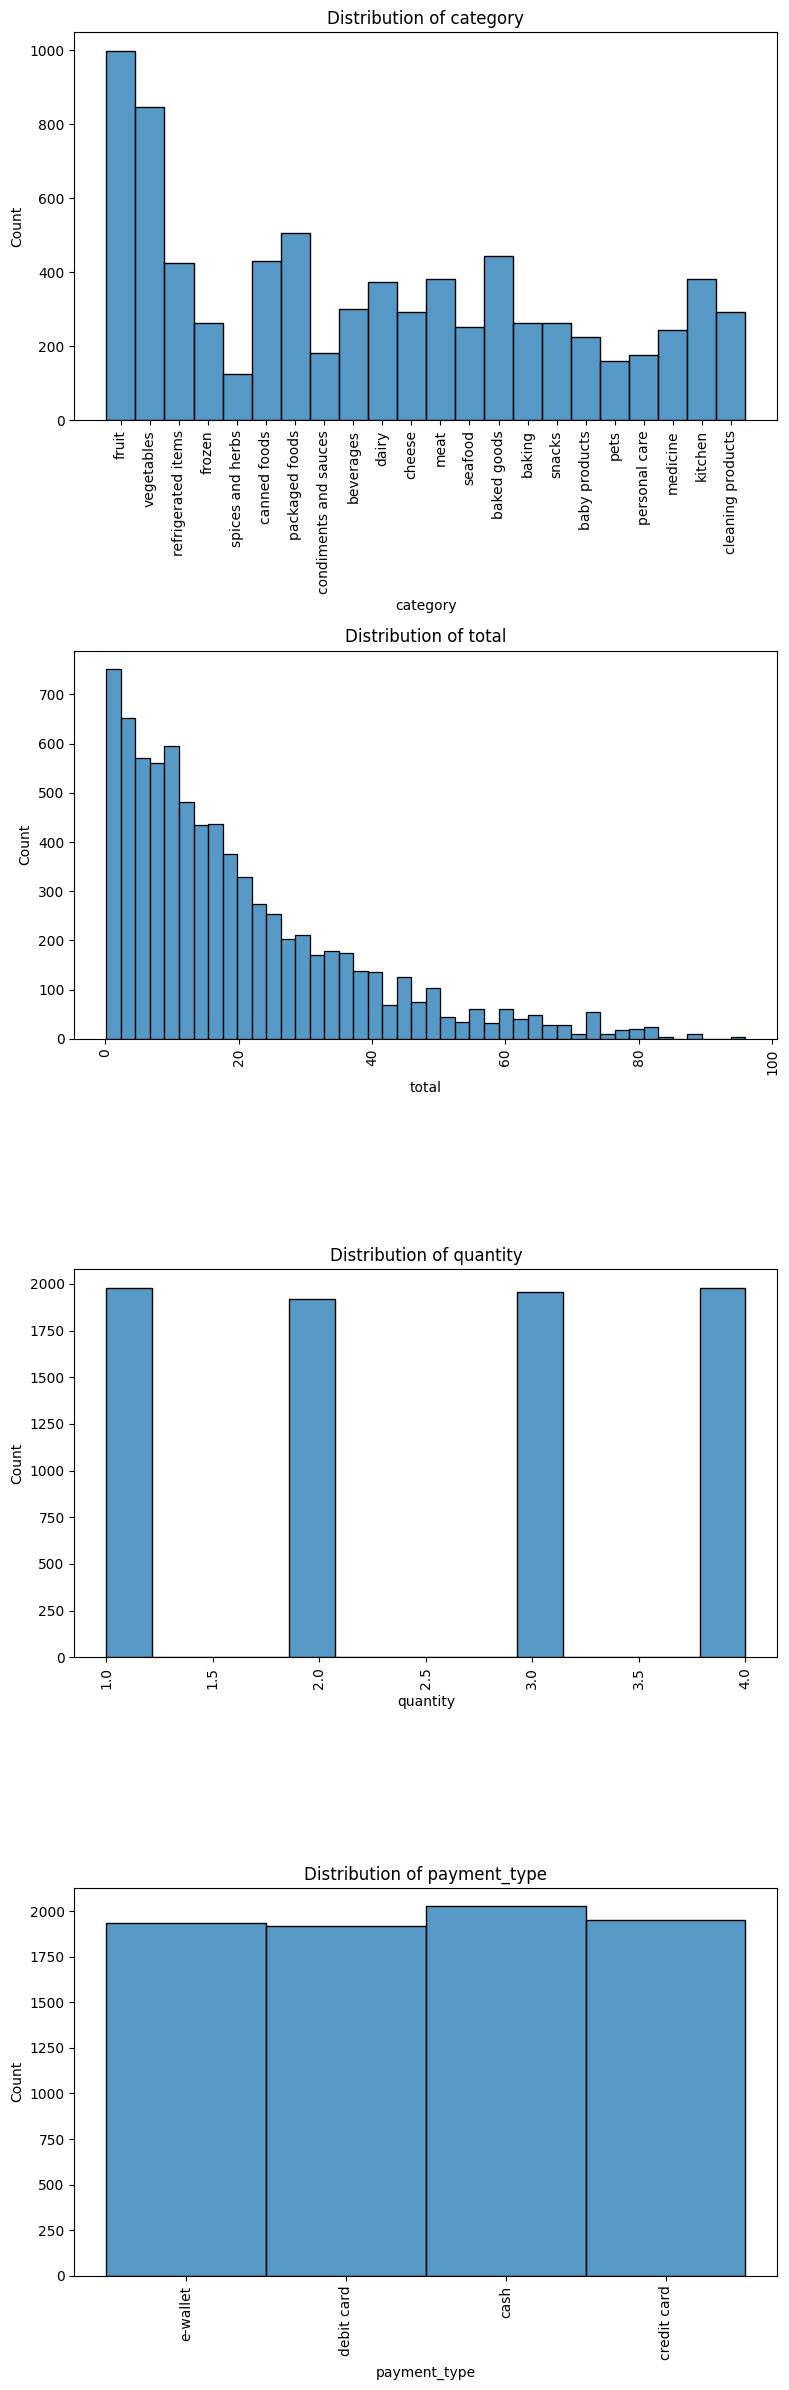

In [56]:

import seaborn as sns
import matplotlib.pyplot as plt

# listing the columns by plot
columns_to_plot = ["category", "total", "quantity","payment_type",]

# verifying columns
if all(col in df.columns for col in columns_to_plot):
    #plotting columns individually 
    fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 6 * len(columns_to_plot)))

    for i, col in enumerate(columns_to_plot):
        sns.histplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()
else:
    print("The specified column is not in the DataFrame.")


Now it is your chance to visualize the columns, give it your best shot! As well as simply visualizing the columns, try to interpret what the results mean in the context of the client.

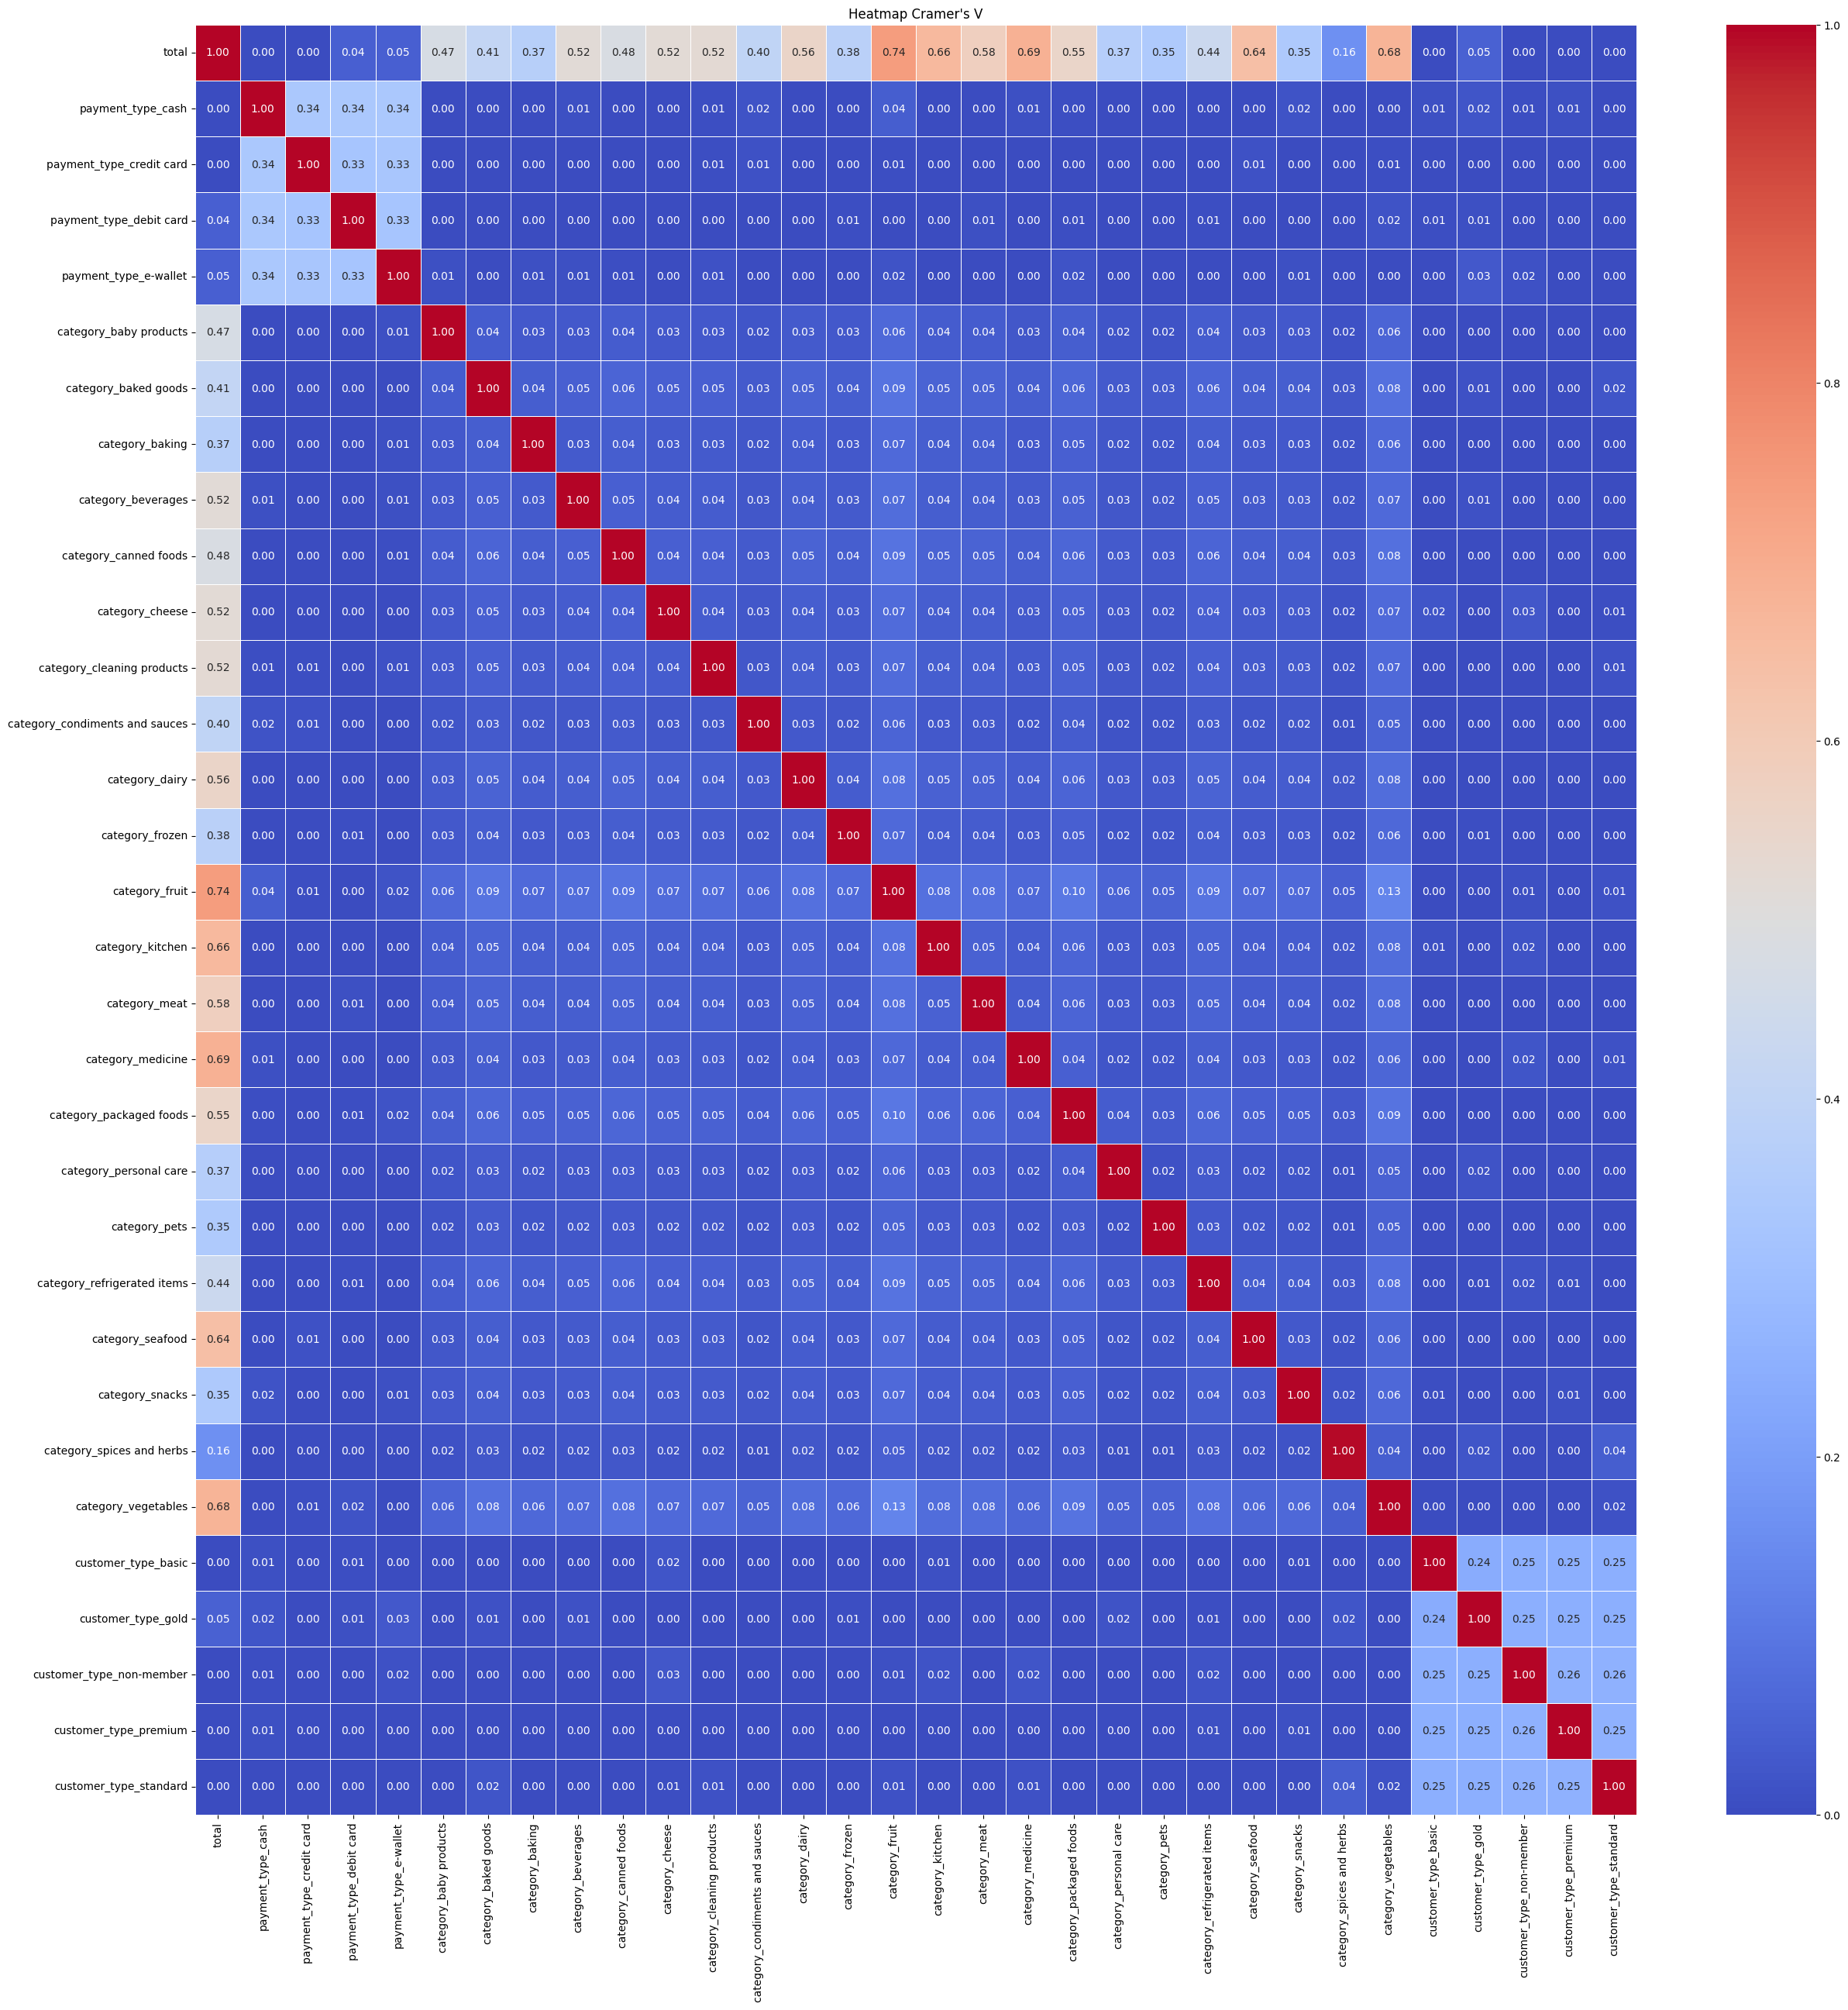

In [64]:

columns_to_plot = ["payment_type","category","total","customer_type"]

if all(col in df.columns for col in columns_to_plot):
    
    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
        rcorr = r - ((r - 1) ** 2) / (n - 1)
        kcorr = k - ((k - 1) ** 2) / (n - 1)
        return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

    
    df_selected = df[columns_to_plot]

    df_dummies = pd.get_dummies(df_selected)

    correlation_matrix = pd.DataFrame(index=df_dummies.columns, columns=df_dummies.columns)
    for i in range(len(df_dummies.columns)):
        for j in range(len(df_dummies.columns)):
            correlation_matrix.iloc[i, j] = cramers_v(df_dummies[df_dummies.columns[i]], df_dummies[df_dummies.columns[j]])

    
    plt.figure(figsize=(30, 30))
    sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
                
    
    plt.title('Heatmap Cramer\'s V')

    plt.show()
else:
    print("The columns aren't in the DataFrame.")


---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

